# Homework 5 - Taming text

## Introduction

In this homework, a large corpus of emails released in public during the Hillary Clinton email controversy will be explored. The corpus is stored in `Data` directory. More informtion of the schema is available [here](https://www.kaggle.com/kaggle/hillary-clinton-emails).

In [1]:
from os import path
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Word clouds
Generate two word clouds:
* One based on the raw corpus
* One based on the corpus pre-processed using the standard text pipeline. 

### a. __Raw text__
#### @TODO: choose the text to take into account
The data we are going to use for producing the clouds is taken from the file `Emails.csv` and refers to the column `RawText`. Hence, before proceeding to build up a unique cloud, we sould concatenate all the `RawText` of the emails. In particular, we do the following:
* Import the data related to the Emails.

In [2]:
# Read data
emails = pd.read_csv('Data/Emails.csv', sep = ',')
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


* Extract the column relates to the `RawText`.

In [3]:
# Useful data
email_corpus = emails['RawText']

* Create a *unique* corpus.

In [4]:
# Create the corpus
unique_corpus = ' '.join([email_corpus[i] for i in range(len(email_corpus))])

Thus, we generate the word cloud. For the moment, in order to indentify the most frequent words, we decide not to fix the maximum font size.

In [5]:
# Generate the word cloud 
wordcloud = WordCloud().generate(unique_corpus)

Visualize the output cloud!

(-0.5, 399.5, 199.5, -0.5)

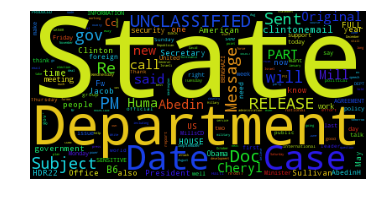

In [6]:
# Display the generated cloud
plt.imshow(wordcloud)
plt.axis("off")

### b. Pre-processed text

To preprocess the text we proceed applying the standard pipeline that includes:
* Tokenization
* Stop-words
* Stemming

In [10]:
import nltk
#nltk.download()
import string

In [42]:
text = nltk.word_tokenize(unique_corpus)

In [43]:
text_token = [i.lower() for i in text if i not in string.punctuation]

In [17]:
from nltk.corpus import stopwords

In [92]:
text_token = [i for i in text_token if i != "''"]

In [94]:
stop_words = stopwords.words('english') + ['gov', 'doc', 're', 'pm', 'sent', 'date', 'unclassified', 'cc', 'fw', 'state.gov', 'mailto', 'subject', 'american']

In [95]:
filtered_words = [word for word in text_token if word not in stop_words]

In [96]:
len(filtered_words)

1827746

In [28]:
from nltk.stem.porter import *

In [97]:
stemmer = PorterStemmer()

In [98]:
text_stemmed = [stemmer.stem(i) for i in filtered_words]

In [68]:
aa = sorted(text_stemmed)

In [99]:
prova = ' '.join(text_stemmed)

(-0.5, 399.5, 199.5, -0.5)

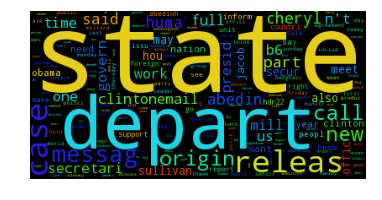

In [100]:
plt.imshow(WordCloud().generate(prova))
plt.axis("off")

## 2.

## 3.

## 4. *BONUS*